<a href="https://colab.research.google.com/github/Vaishnavii-27/deep_learning_models_implementation-/blob/main/RNN_to_predict_no.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
def generate_sequence_data(num_samples, seq_length):
    X = []
    y = []
    for _ in range(num_samples):
        start_num = np.random.randint(0, 100)
        sequence = [start_num + i for i in range(seq_length + 1)]
        X.append(sequence[:-1])
        y.append(sequence[-1])
    return np.array(X), np.array(y)

In [ ]:
num_samples = 1000
seq_length = 10

In [ ]:
X_train, y_train = generate_sequence_data(num_samples, seq_length)

In [ ]:
X_train = X_train.reshape((num_samples, seq_length, 1))

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1000, 10, 1)
y_train shape: (1000,)


In [ ]:
print("\nSample input (X_train[0]):", X_train[0].flatten())
print("Sample target (y_train[0]):", y_train[0])


Sample input (X_train[0]): [ 7  8  9 10 11 12 13 14 15 16]
Sample target (y_train[0]): 17


In [ ]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5063.1411 - mae: 60.8317 - val_loss: 54.2933 - val_mae: 7.0371
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.5407 - mae: 5.6224 - val_loss: 21.1332 - val_mae: 4.5005
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.8694 - mae: 3.2490 - val_loss: 1.8950 - val_mae: 1.1747
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9243 - mae: 1.1700 - val_loss: 1.5101 - val_mae: 1.0659
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7964 - mae: 1.1460 - val_loss: 1.4981 - val_mae: 1.0344
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5201 - mae: 1.0109 - val_loss: 1.4500 - val_mae: 1.0226
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5315 - mae: 1.0220 - val_loss: 1.4176 - val_mae: 1.0126
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4390 - mae: 0.9804 - val_loss: 1.3913 - val_mae: 1.0038
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.456

In [ ]:
import matplotlib.pyplot as plt

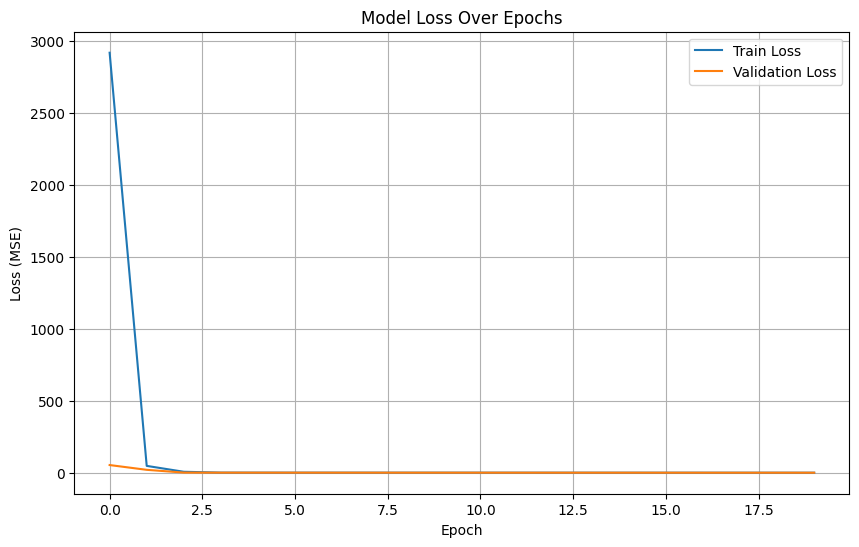

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
new_sequence = np.array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])
new_sequence = new_sequence.reshape((1, seq_length, 1))

In [ ]:
predicted_next_number = model.predict(new_sequence)[0][0]
print(f"\nInput sequence: {new_sequence.flatten()}")
print(f"Predicted next number: {predicted_next_number:.2f}")
print(f"Expected next number: 111")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step

Input sequence: [101 102 103 104 105 106 107 108 109 110]
Predicted next number: 112.13
Expected next number: 111
